In [91]:
import numpy as np
from matplotlib import pyplot as plt

In [92]:
class Perceptron:
    def __init__(self, N, lr=0.05):
        # initialize the weight matrix and store the learning rate
        self.W = np.random.randn(N + 1)
        self.lr = lr
        
    def sigmoid(self, x):
        # apply the activation function
        return 1. / (1 + np.exp(-x))
    
    def fit(self, X, y, epochs=10):
        history = []
        # insert a column of 1’s as the last entry in the feature
        # matrix -- this little trick allows us to treat the bias
        # as a trainable parameter within the weight matrix
        X = np.c_[X, np.ones((X.shape[0]))]
        # loop over the desired number of epochs
        for _ in np.arange(0, epochs):
            loss = 0
            # loop over each individual data point
            for (x, target) in zip(X, y):
                # take the dot product between the input features
                # and the weight matrix, then pass this value
                p = np.dot(x, self.W)
                # through the step function to obtain the prediction
                p = self.sigmoid(p)
                # determine the error
                error = p - target
                # update the weight matrix
                self.W += -self.lr * error * x
                loss += abs(error)
            history.append(loss)
        return history
                    
    def predict(self, X):
        # ensure our input is a matrix
        X = np.atleast_2d([X])
        # insert a column of 1’s as the last entry in the feature
        X = np.c_[X, np.ones((X.shape[0]))]
        # take the dot product between the input features
        # and the weight matrix, then pass this value
        p = np.dot(X, self.W)
        # through the step function to obtain the prediction
        p = self.sigmoid(p)
        return p

In [93]:
def train_perceptron(X, y):
    # define my perceptron and train it
    nn  = Perceptron(X.shape[1])
    history = nn.fit(X, y, epochs=2000)
    plt.plot(history)
    plt.show()
    # now that our network is trained, loop over the data points
    for (x, target) in zip(X, y):
        # make a prediction on the data point and display the result
        p = nn.predict(x)
        pred = 1 if p > 0.5 else 0
        print("[INFO] data={}, ground-truth={}, pred={}({})".format(x, target[0], pred, p))

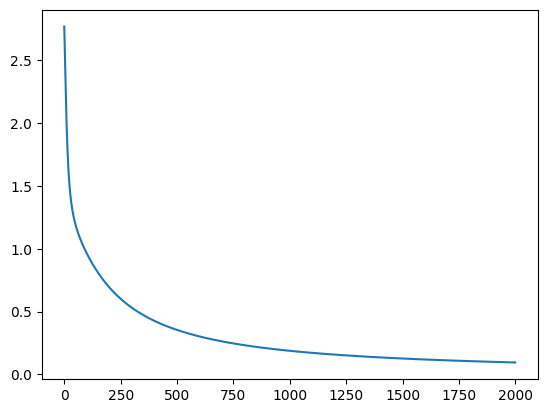

[INFO] data=[0 0], ground-truth=0, pred=0([0.05240038])
[INFO] data=[0 1], ground-truth=1, pred=1([0.97915166])
[INFO] data=[1 0], ground-truth=1, pred=1([0.97921395])
[INFO] data=[1 1], ground-truth=1, pred=1([0.99997501])


In [94]:
# construct the OR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])
train_perceptron(X, y)

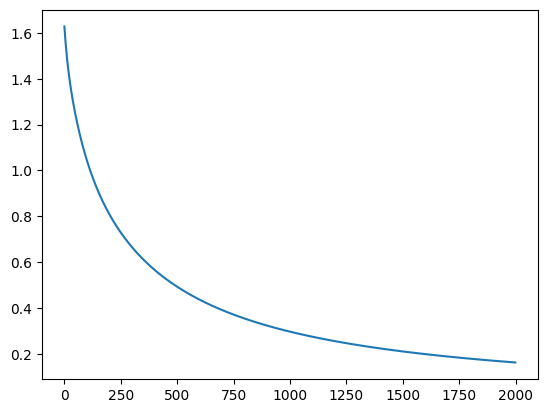

[INFO] data=[0 0], ground-truth=0, pred=0([0.00018215])
[INFO] data=[0 1], ground-truth=0, pred=0([0.04799529])
[INFO] data=[1 0], ground-truth=0, pred=0([0.04812719])
[INFO] data=[1 1], ground-truth=1, pred=1([0.93329419])


In [95]:
# construct the AND dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])
train_perceptron(X, y)

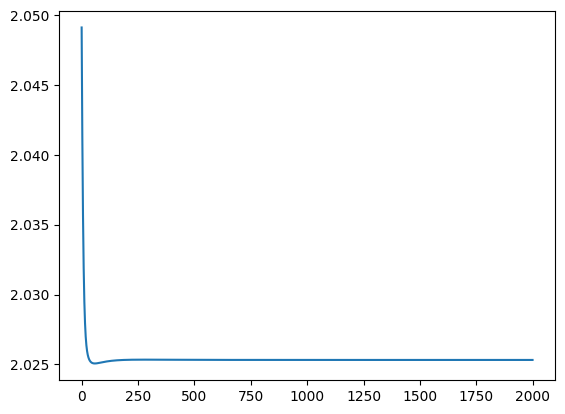

[INFO] data=[0 0], ground-truth=0, pred=1([0.50632878])
[INFO] data=[0 1], ground-truth=1, pred=1([0.5])
[INFO] data=[1 0], ground-truth=1, pred=0([0.49367123])
[INFO] data=[1 1], ground-truth=0, pred=0([0.48734448])


In [96]:
# construct the XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
train_perceptron(X, y)

No matter how many times you run this experiment with varying learning rates or different
weight initialization schemes, you will never be able to correctly model the XOR function with a
single layer Perceptron. Instead, what we need is more layers – and with that, comes the start of
deep learning.